In [1]:
year = 2018

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [4]:
procesador = ProcesadorDeVotaciones(year, year, 'data')
congreso = procesador.procesar()

Loading from data/2018/1
Loading from data/2018/2
Loading from data/2018/3
Loading from data/2018/4
Loading from data/2018/5
Loading from data/2018/6
Loading from data/2018/7
Loading from data/2018/8
Loading from data/2018/9
Loading from data/2018/10
Loading from data/2018/11
Loading from data/2018/12


In [5]:
congreso.validate()

In [6]:
maker = HeavyGraphMaker(congreso)

Vemos el grafo original: positivo y negativo

In [7]:
original = maker.create_year_network(year)

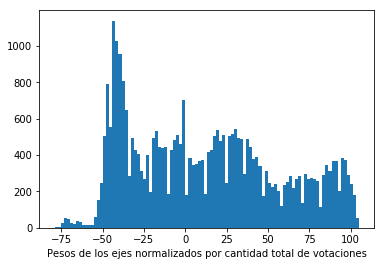

In [8]:
x = original.get_sorted_edges_weights().values()
plt.hist(x, bins = 100)
plt.xlabel('Pesos de los ejes normalizados por cantidad total de votaciones')
plt.show()

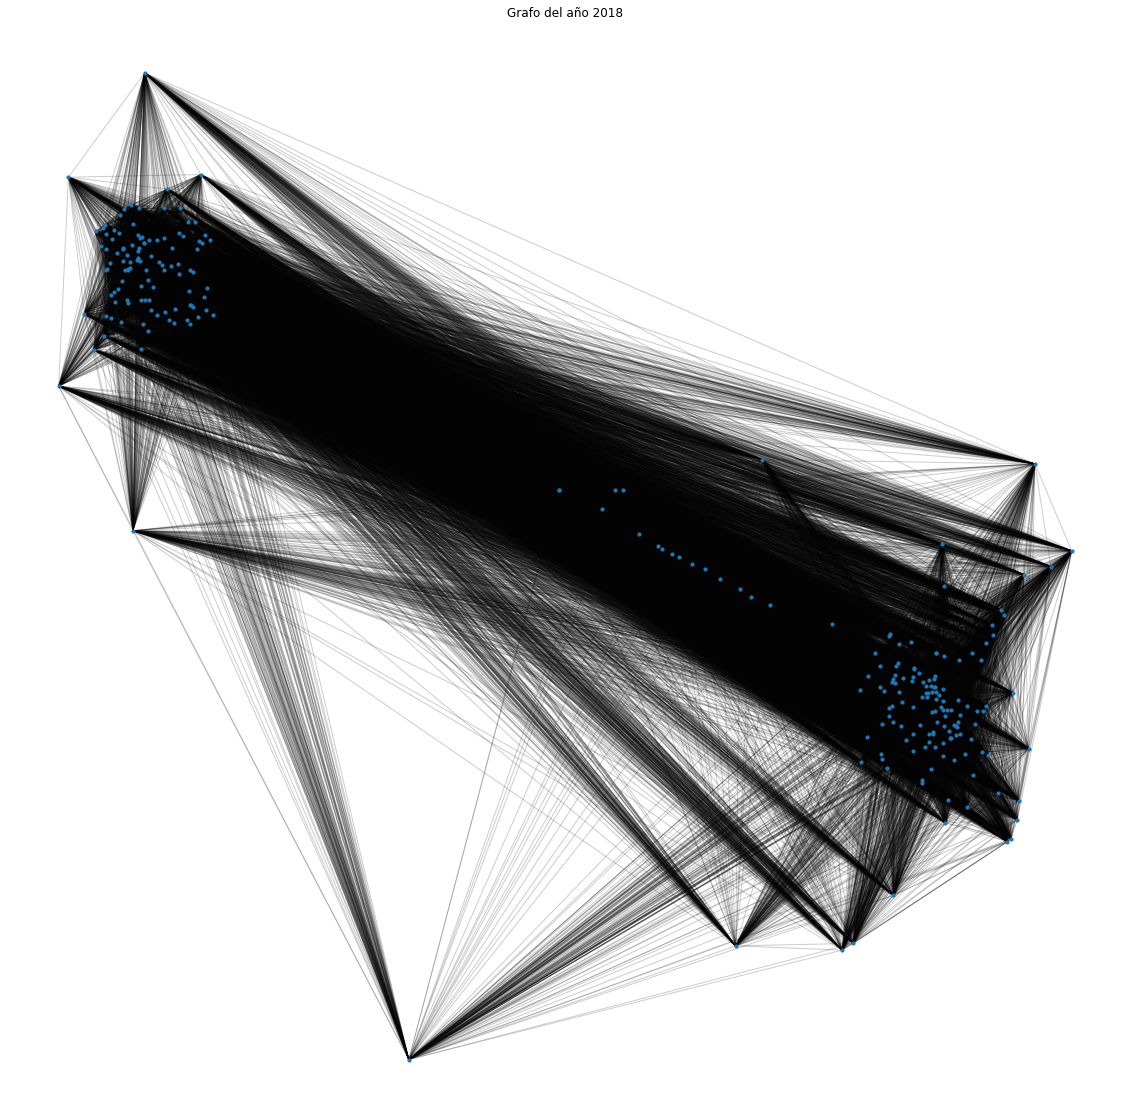

In [9]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = original.get_nodes()
pos = nx.spring_layout(original.graph)
ec = nx.draw_networkx_edges(original.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(original, pos, nodelist=nodos,
                        with_labels=False, node_size=10, cmap=plt.cm.jet)
axs.set_title(f'Grafo del año {year}')
axs.axis('off')
plt.show()

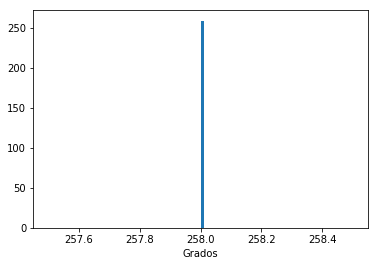

In [10]:
degree = []
for node in original.get_nodes():
    degree.append(original.degree(node))
plt.hist(degree, bins = 100)
plt.xlabel('Grados')
plt.show()

In [11]:
print(f' Ese anio se trataron {len(congreso.votings[year])} votaciones')

 Ese anio se trataron 105 votaciones


Vemos el positivo

In [12]:
grafo = maker.create_year_network(year, positive = True)

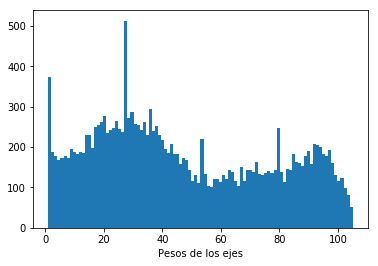

In [13]:
x = grafo.get_sorted_edges_weights().values()
plt.hist(x, bins = 100)
plt.xlabel('Pesos de los ejes')
plt.show()

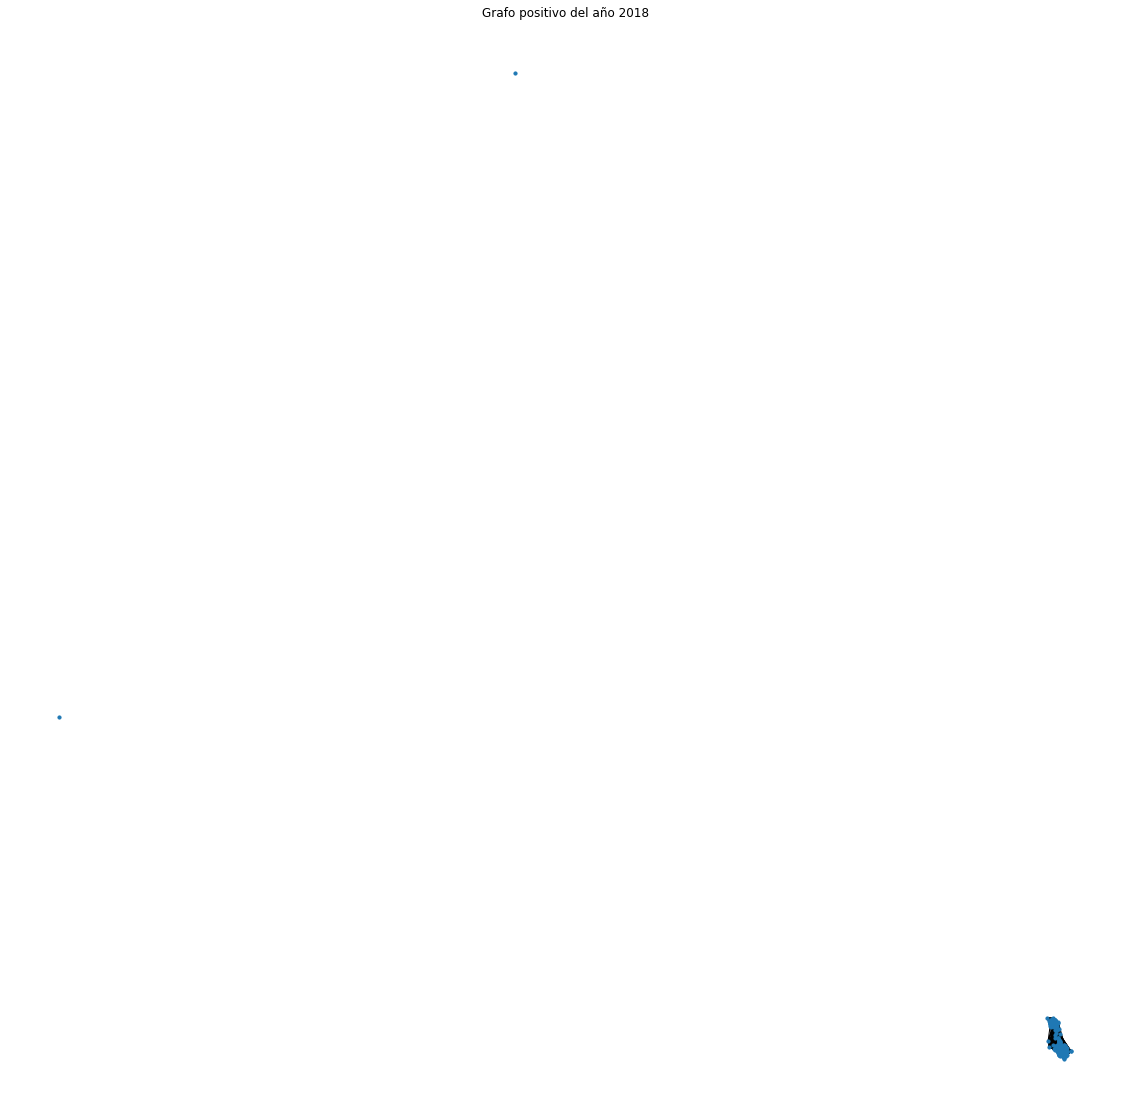

In [14]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo.get_nodes()
pos = nx.spring_layout(grafo.graph)
ec = nx.draw_networkx_edges(grafo.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo, pos, nodelist=nodos,
                        with_labels=False, node_size=10, cmap=plt.cm.jet)
axs.set_title(f'Grafo positivo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}.jpg')
plt.show()

In [15]:
print(f' El grafo tiene {len(grafo.get_edges())} enlaces')

 El grafo tiene 18285 enlaces


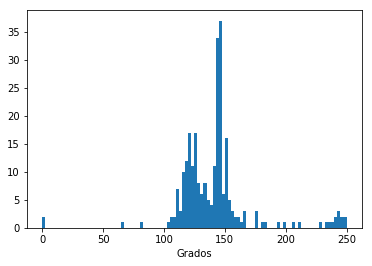

In [16]:
degree = []
for node in grafo.get_nodes():
    degree.append(grafo.degree(node))
plt.hist(degree, bins = 100)
plt.xlabel('Grados')
plt.show()

Lo cortamos.

In [17]:
copia = grafo.copy()
grafo_cortado = NewDisparityFilter(copia).alpha_cut(alpha_t = 0.05)

The graph has 18285 edges
Max alpha is 0.1610345350468151, min alpha is 0.0031099370285822005
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
16696 edges deleted, 1589 left
Gigant component is 0.9922779922779923 of the total


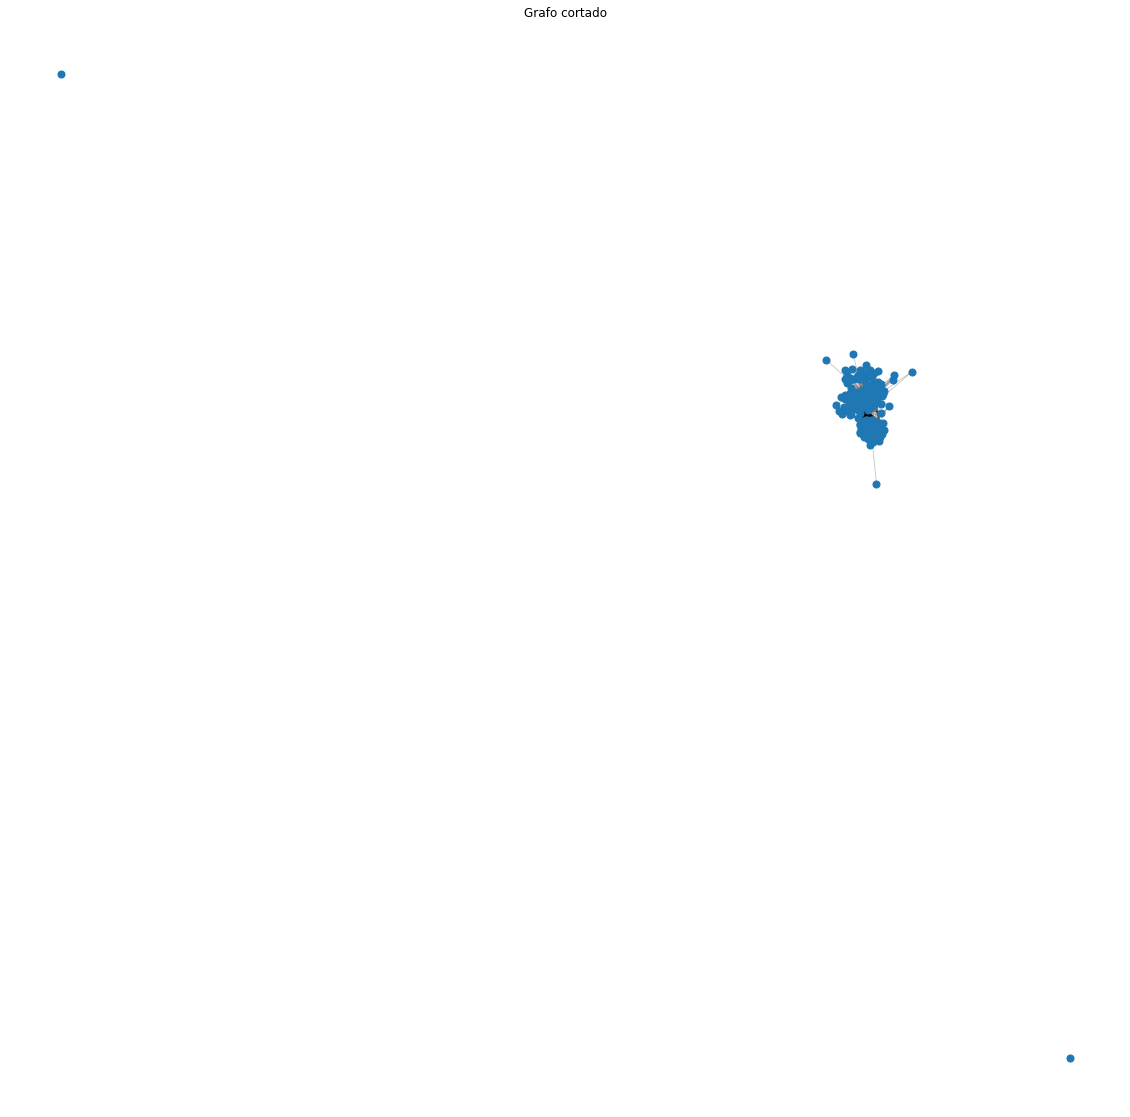

In [18]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}_GC.jpg')
plt.show()

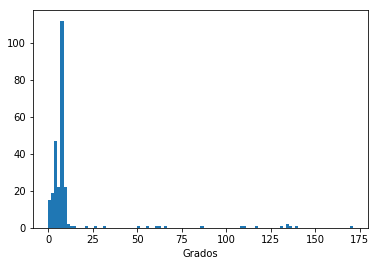

In [19]:
degree = []
for node in grafo_cortado.get_nodes():
    degree.append(grafo_cortado.degree(node))
plt.hist(degree, bins = 100)
plt.xlabel('Grados')
plt.show()    

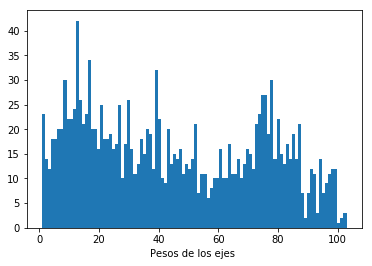

In [20]:
x = grafo_cortado.get_sorted_edges_weights().values()
plt.hist(x, bins = 100)
plt.xlabel('Pesos de los ejes ')
plt.show()

Vemos el negativo.


In [21]:
grafo_neg = maker.create_year_network(year, negative = True)

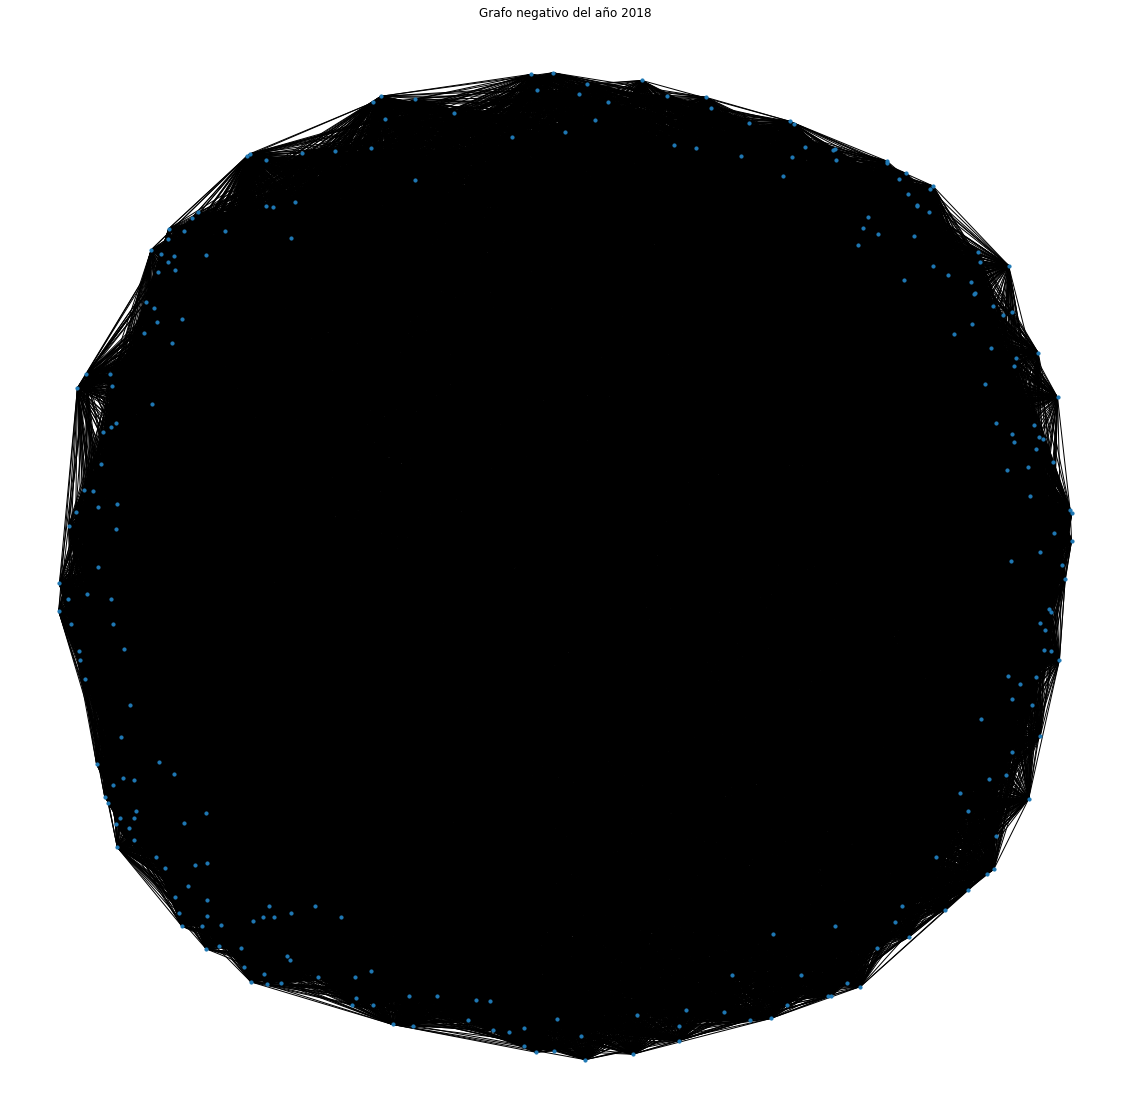

In [22]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_neg.get_nodes()
pos = nx.spring_layout(grafo_neg.graph)
ec = nx.draw_networkx_edges(grafo_neg.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo_neg, pos, nodelist=nodos,
                        with_labels=False, node_size=10, cmap=plt.cm.jet)
axs.set_title(f'Grafo negativo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/positive_graphs/{year}.jpg')
plt.show()

In [23]:
copia2 = grafo_neg.copy()
grafo_cortado_neg = NewDisparityFilter(copia2).alpha_cut(alpha_t = 0.005)

The graph has 14643 edges
Max alpha is 0.10967096032602029, min alpha is 1.3821128976619201e-38
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
13935 edges deleted, 708 left
Gigant component is 0.803088803088803 of the total


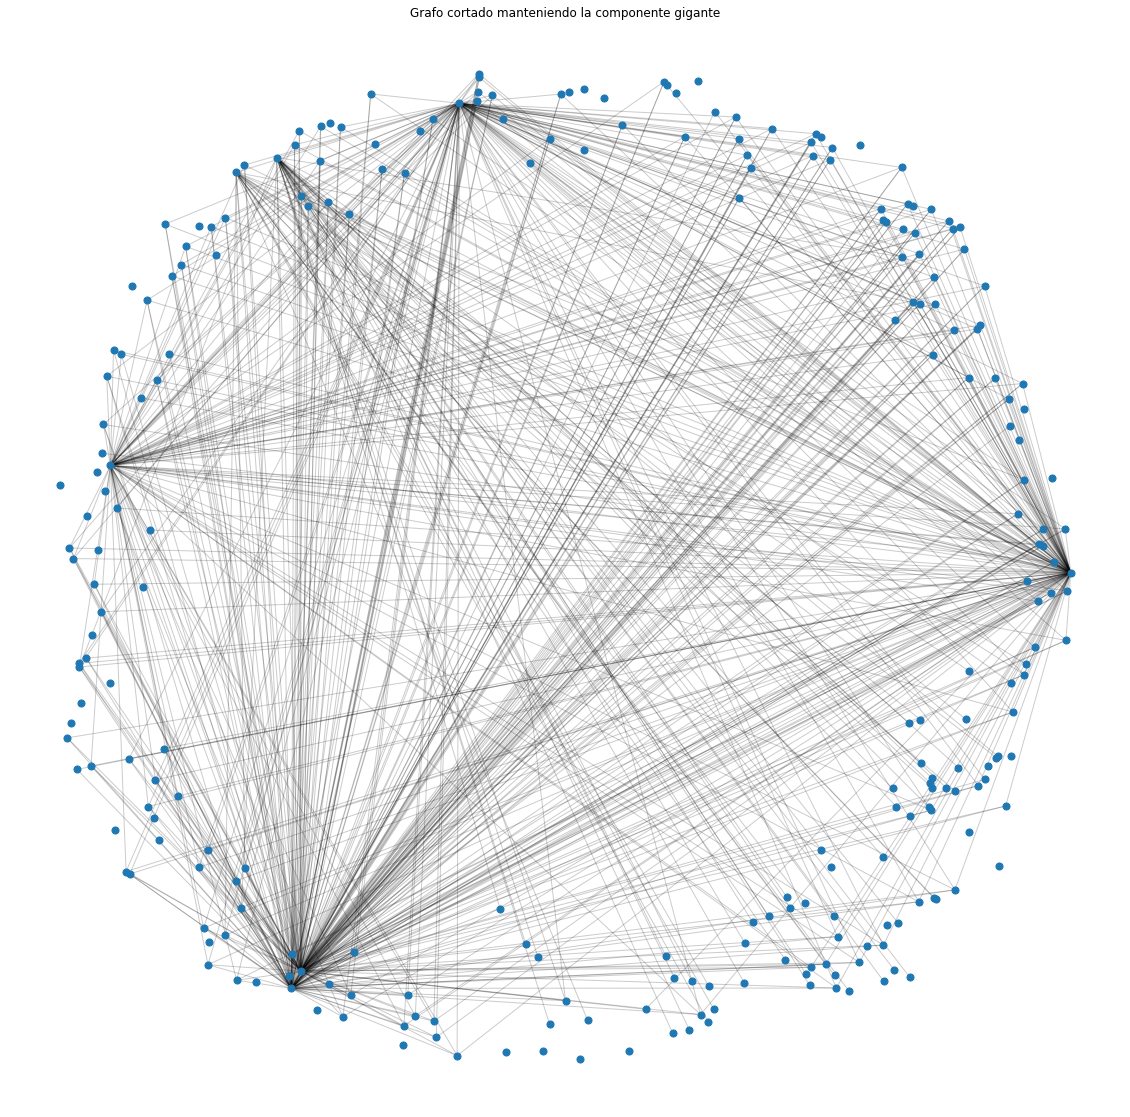

In [24]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado_neg.get_nodes()
pos = nx.spring_layout(grafo_cortado_neg.graph)
ec = nx.draw_networkx_edges(grafo_cortado_neg.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado_neg, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado manteniendo la componente gigante')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}_GC.jpg')
plt.show()

In [25]:
edges_to_add = list(grafo_cortado_neg.get_edges(data = True))

In [26]:
grafo_cortado.add_edges_from_list(edges_to_add)

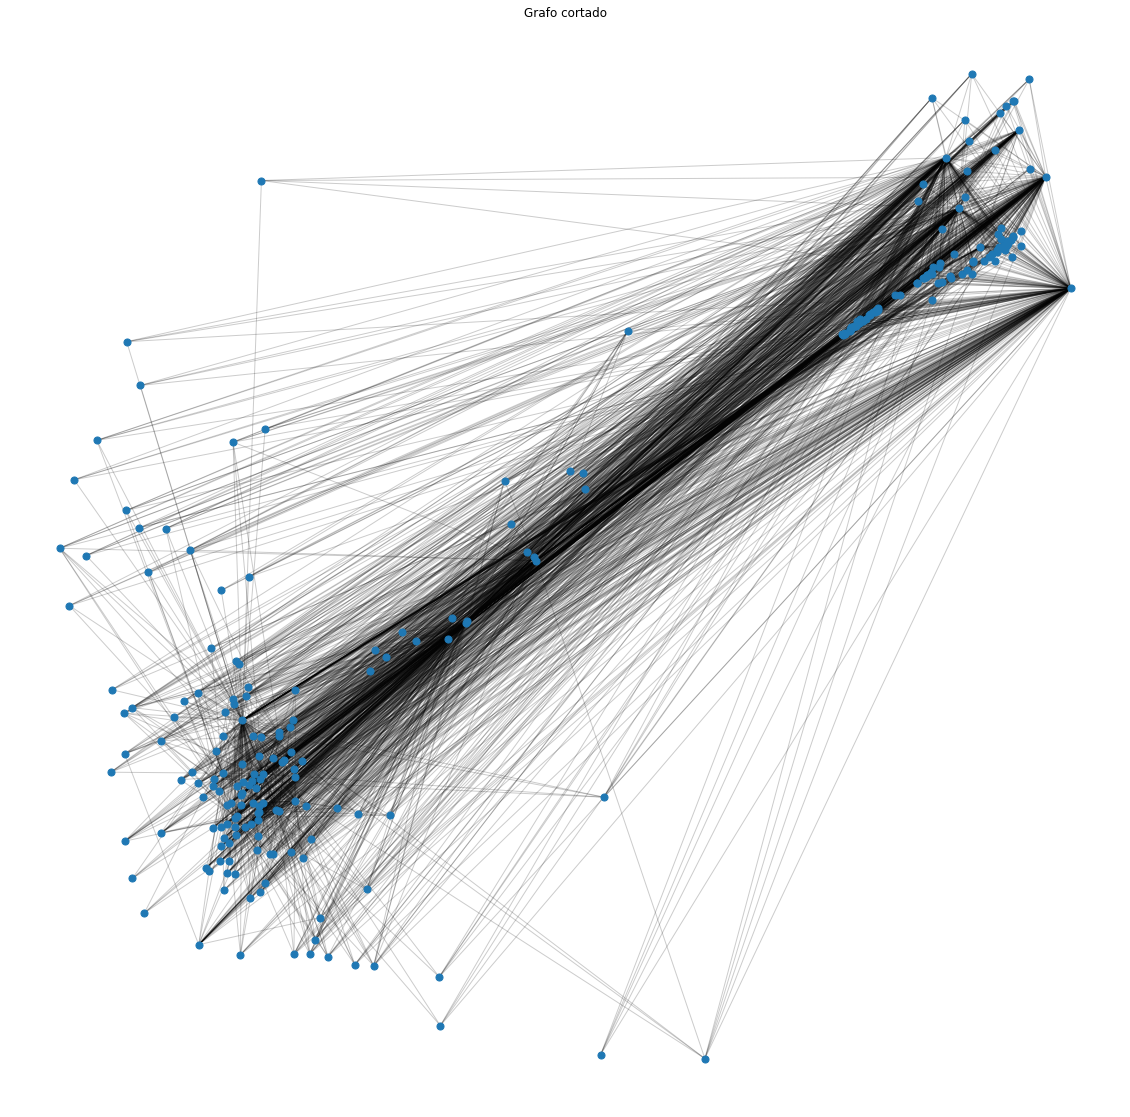

In [27]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, cmap=plt.cm.jet)
axs.set_title(f'Grafo cortado')
axs.axis('off')

plt.savefig(f'../figs/positive_graphs/{year}_GC.jpg')
plt.show()